In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.stats import norm

import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import edward2 as ed
tfd = tfp.distributions

sns.set()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
%config InlineBackend.figure_format = 'svg'
np.random.seed(111)
tf.random.set_seed(111)

In [2]:
# Settings
D = 4   #number of dimensions
N = 100 #number of datapoints to generate
noise_std_true = 1.0

# Generate data
b_true = np.random.randn(1).astype(np.float32)    #bias (alpha)
w_true = np.random.randn(D, 1).astype(np.float32) #weights (beta)
x = np.random.randn(N, D).astype(np.float32)
noise = noise_std_true * np.random.randn(N,1).astype(np.float32)
y = np.matmul(x, w_true) + b_true + noise

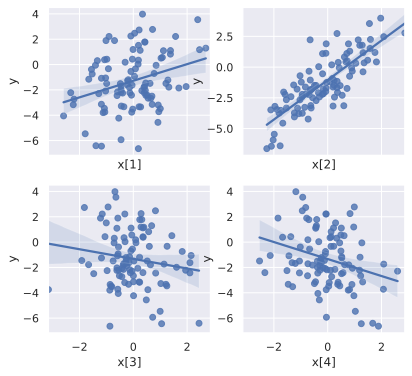

In [3]:

# Show data
fig, axes = plt.subplots(int(np.ceil(D/2)), 2, sharex=True)
fig.set_size_inches(6.4, 6)
for i in range(D):
  t_ax = axes[int(i/2), i%2] #this axis
  sns.regplot(x[:,i], y[:,0], ax=t_ax)
  t_ax.set_ylabel('y')
  t_ax.set_xlabel('x[%d]'%(i+1))
plt.show()


In [4]:
print('True bias: %0.2f' % b_true)
print('True weights: ', w_true[:,0])

True bias: -1.13
True weights:  [ 0.3843192  1.4965538 -0.3553823 -0.7875335]
